In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [8]:
df=pd.read_csv('IMDb rating.csv')

In [10]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.shape

(15509, 10)

In [5]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [12]:
df.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


In [15]:
df.dropna(inplace=True)

In [17]:
df.shape

(5659, 10)

In [24]:
df[['Name','Rating']].head(10)

,Name,Rating
1,#Gadhvi (He thought he was Gandhi),7.0
3,#Yaaram,4.4
5,...Aur Pyaar Ho Gaya,4.7
6,...Yahaan,7.4
8,?: A Question Mark,5.6
9,@Andheri,4.0
10,1:1.6 An Ode to Lost Love,6.2
11,1:13:7 Ek Tera Saath,5.9
12,100 Days,6.5
13,100% Love,5.7


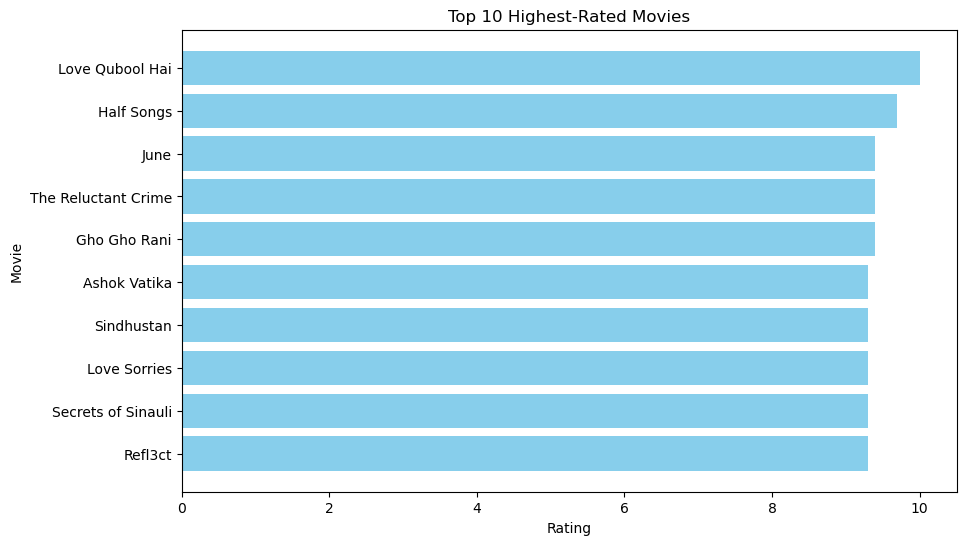

In [30]:
top_rated_movies=df.sort_values(by='Rating',ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top_rated_movies['Name'],top_rated_movies['Rating'],color='skyblue' )
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.title('Top 10 Highest-Rated Movies')
plt.gca().invert_yaxis()
plt.show()

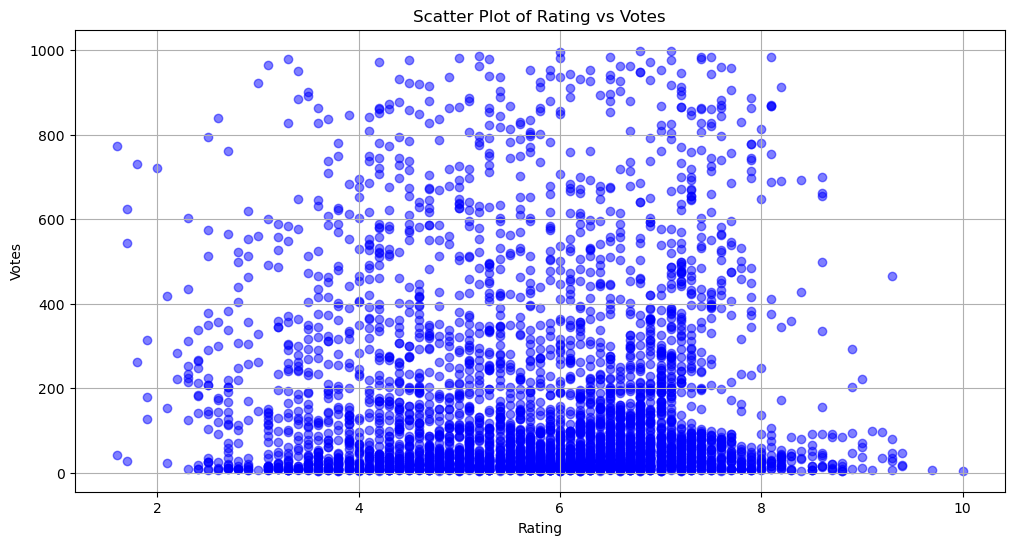

In [35]:
df['Votes']=pd.to_numeric(df['Votes'],errors='coerce')
plt.figure(figsize=(12,6))
plt.scatter(df['Rating'],df['Votes'],alpha=0.5,color='b')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Scatter Plot of Rating vs Votes')
plt.grid(True)
plt.show()

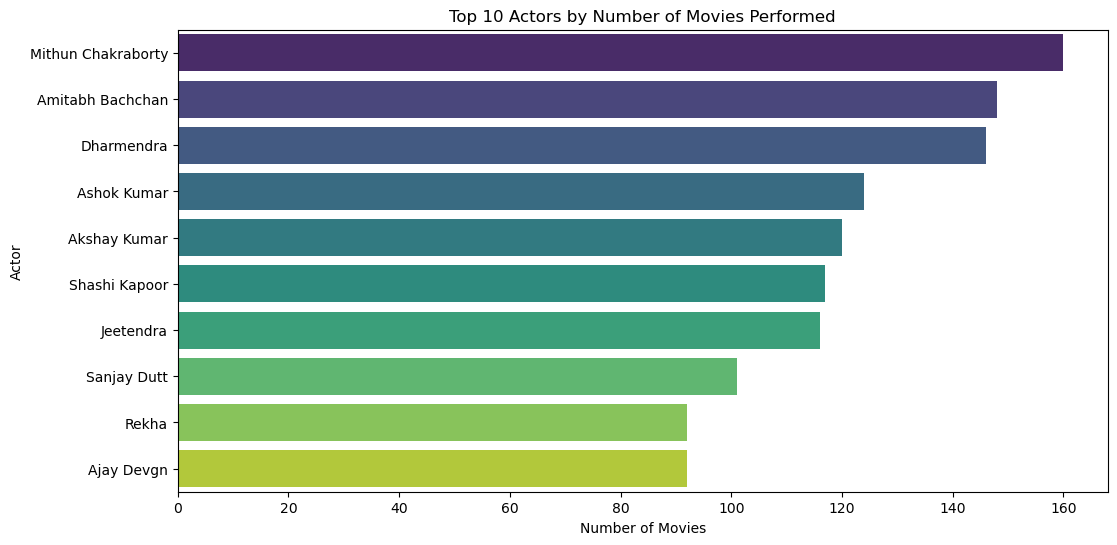

In [34]:
actors=pd.concat([df['Actor 1'],df['Actor 2'],df['Actor 3']])
actor_counts=actors.value_counts().reset_index()
actor_counts.columns=['Actor','Number of Movies']
plt.figure(figsize=(12,6))
sns.barplot(x='Number of Movies', y='Actor',data=actor_counts.head(10),palette='viridis')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Top 10 Actors by Number of Movies Performed')
plt.show()

# Model Training and Testing

In [38]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

 
numerical_columns = ['Year', 'Duration', 'Votes']

 
X = df[numerical_columns]
y = df['Rating']

 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 
imputer = SimpleImputer(strategy='mean')  
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [39]:
model=LinearRegression()

In [40]:

model.fit(X_train_imputed, y_train)

LinearRegression()

In [41]:
X_test_imputed = imputer.transform(X_test)

 
y_pred = model.predict(X_test_imputed)

In [42]:
mae=mean_absolute_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred,squared=False)
r2=r2_score(y_test,y_pred)
print(f"Mean Absolute Error:{mae}")
print(f"Root Mean Squared Error:{rmse}")
print(f"R-squared(R2)Score:{r2}")

Mean Absolute Error:1.0829812089097381
Root Mean Squared Error:1.3310172745040187
R-squared(R2)Score:0.04327632567850381


# visualization 

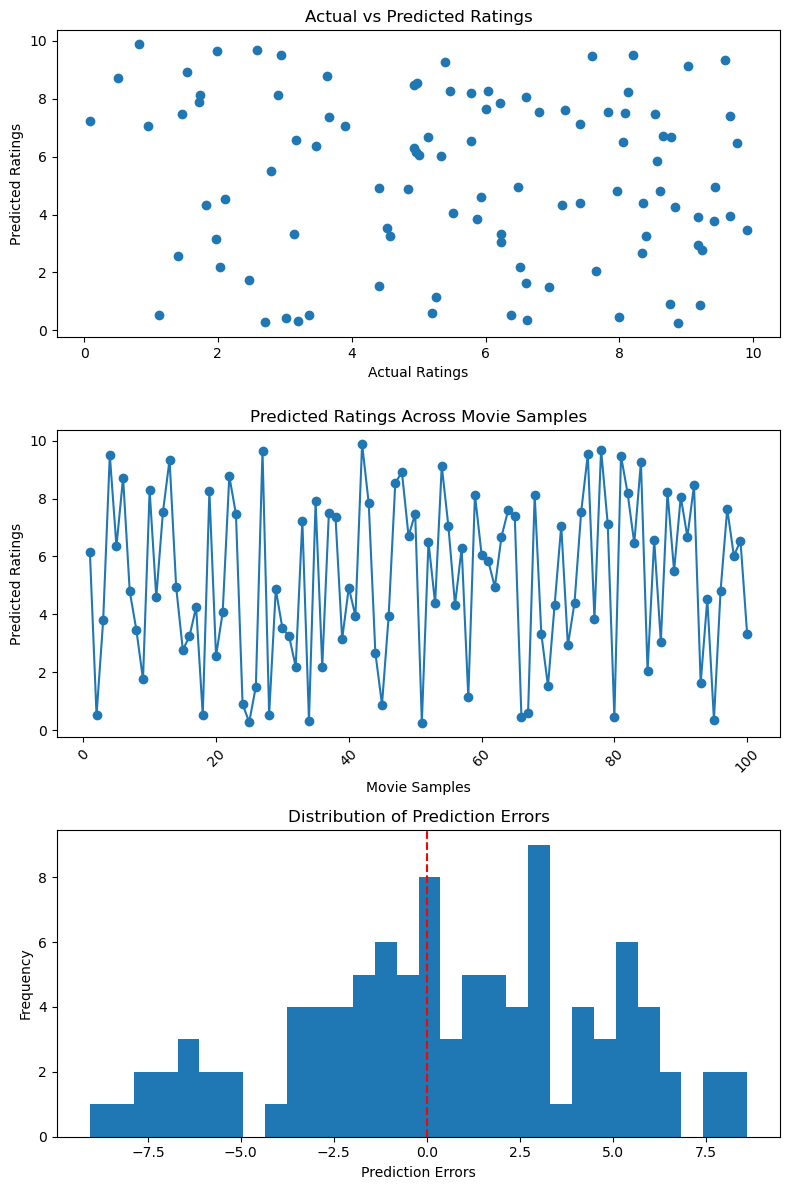

In [43]:
y_test=np.random.rand(100)*10
y_pred=np.random.rand(100)*10
errors=y_test-y_pred
fig,axs=plt.subplots(3,1,figsize=(8,12))
axs[0].scatter(y_test,y_pred)
axs[0].set_xlabel("Actual Ratings")
axs[0].set_ylabel("Predicted Ratings")
axs[0].set_title("Actual vs Predicted Ratings")

#Line plot
movie_samples=np.arange(1,len(y_pred)+1)
axs[1].plot(movie_samples,y_pred,marker='o',linestyle='-')
axs[1].set_xlabel("Movie Samples")
axs[1].set_ylabel("Predicted Ratings")
axs[1].set_title("Predicted Ratings Across Movie Samples")
axs[1].tick_params(axis='x',rotation=45)

#Histogram
axs[2].hist(errors,bins=30)
axs[2].set_xlabel("Prediction Errors")
axs[2].set_ylabel("Frequency")
axs[2].set_title("Distribution of Prediction Errors")
axs[2].axvline(x=0,color='r',linestyle='--')
plt.tight_layout()
plt.show()